In [104]:
# Taoheed King
# INST414_AI-ML-Salaries-Analysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
salaries = pd.read_csv('AI_MLsalaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [106]:
salaries.shape
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [107]:
salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [108]:
salaries['remote_ratio'].value_counts()

100    781
0      412
50     139
Name: remote_ratio, dtype: int64

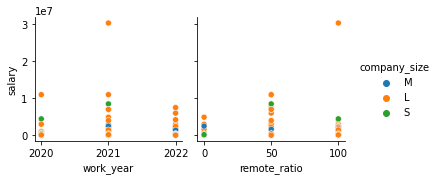

In [109]:
sns.pairplot(salaries,x_vars=['work_year','remote_ratio'],y_vars=['salary'],hue='company_size')

In [110]:
salaries.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.111416,0.213410,-0.044703
salary,-0.111416,1.000000,-0.063502,0.007635
salary_in_usd,0.213410,-0.063502,1.000000,0.002075
remote_ratio,-0.044703,0.007635,0.002075,1.000000


<AxesSubplot:>

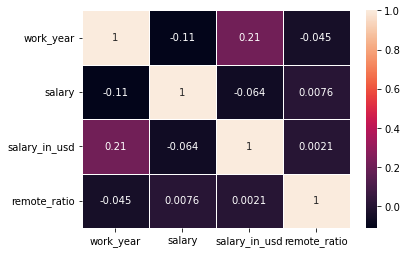

In [111]:
# There is no correlation between our data when compared to salary
sns.heatmap(salaries.corr(),annot=True,lw=1)

In [112]:
salaries['company_size'] = salaries['company_size'].map({
    'S': 'Startup',
    'M': 'Medium',
    'L': 'Big Enterprise'
})
salaries['employment_type'] = salaries['employment_type'].map({
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})
salaries['remote_ratio'] = salaries['remote_ratio'].map({
    0: 'WFO',
    50: 'Hybrid',
    100: 'WFH'
})
salaries['experience_level'] = salaries['experience_level'].map({
    'EN': 'Junior',
    'MI': 'Intermediate',
    'SE': 'Expert',
    'EX': 'Director'
})
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Intermediate,Full-time,Machine Learning Engineer,130000,USD,130000,US,WFO,US,Medium
1,2022,Intermediate,Full-time,Machine Learning Engineer,90000,USD,90000,US,WFO,US,Medium
2,2022,Intermediate,Full-time,Data Scientist,120000,USD,120000,US,WFH,US,Medium
3,2022,Intermediate,Full-time,Data Scientist,100000,USD,100000,US,WFH,US,Medium
4,2022,Intermediate,Full-time,Data Scientist,85000,USD,85000,US,WFH,US,Medium


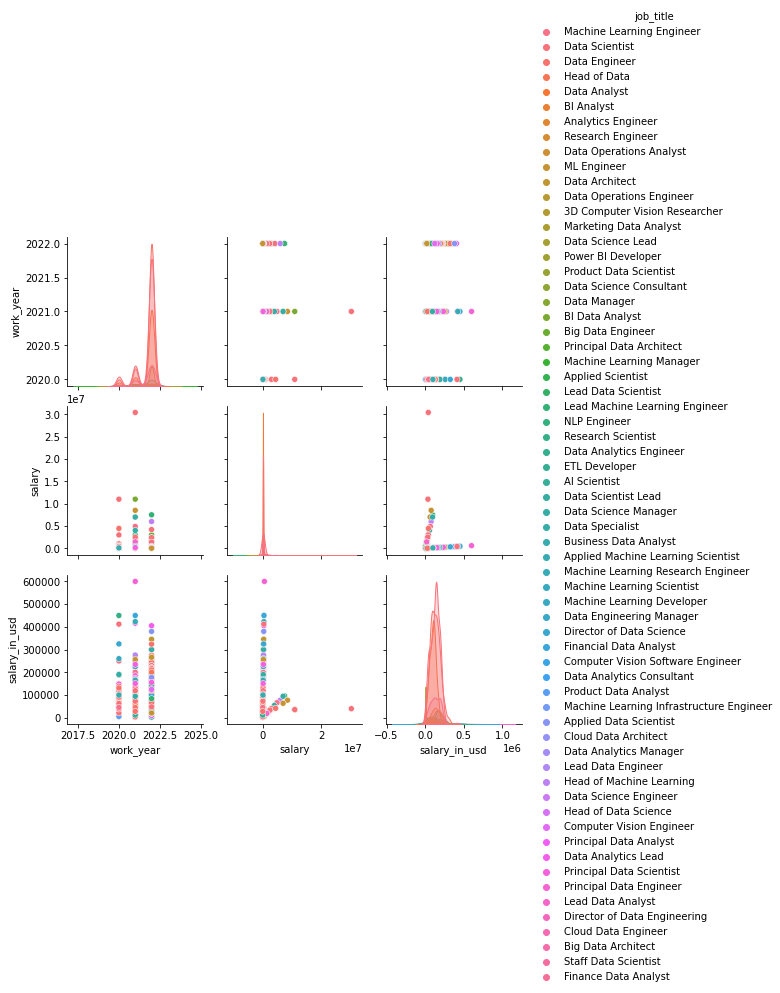

In [113]:
sns.pairplot(salaries, hue='job_title')

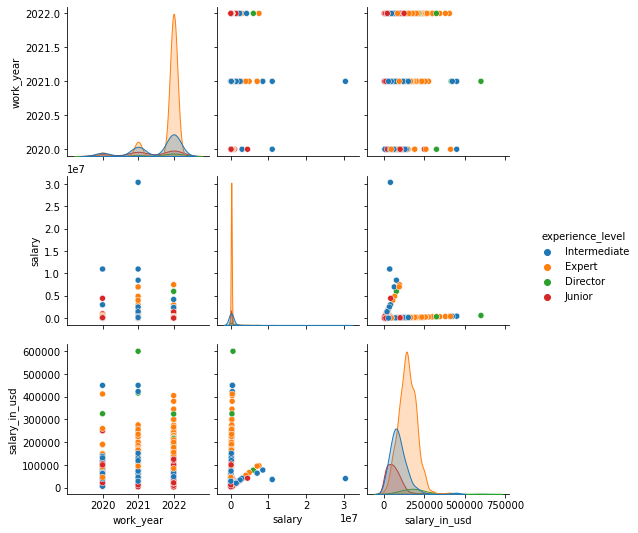

In [114]:
sns.pairplot(salaries, hue='experience_level')

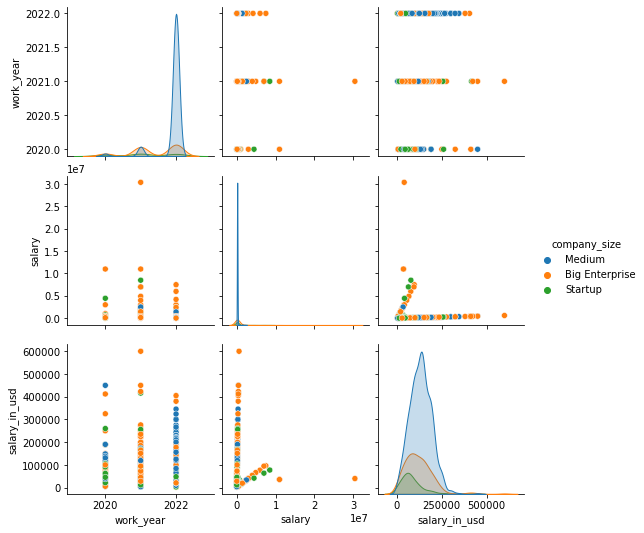

In [115]:
sns.pairplot(salaries, hue='company_size')

In [116]:
# Which role has the highest salary employment wise?
highestSalary = salaries.groupby('job_title').max()['salary_in_usd'].sort_values(ascending=False)
highestSalary

job_title
Principal Data Engineer               600000
Financial Data Analyst                450000
Research Scientist                    450000
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
                                       ...  
Principal Data Architect               38483
Machine Learning Research Engineer     20000
Product Data Scientist                  8000
Power BI Developer                      5409
3D Computer Vision Researcher           5409
Name: salary_in_usd, Length: 64, dtype: int64

In [117]:
top5 = highestSalary[:5]
bottom5 = highestSalary[-5:]
print(top5, '\n\n', bottom5)

job_title
Principal Data Engineer               600000
Financial Data Analyst                450000
Research Scientist                    450000
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
Name: salary_in_usd, dtype: int64 

 job_title
Principal Data Architect              38483
Machine Learning Research Engineer    20000
Product Data Scientist                 8000
Power BI Developer                     5409
3D Computer Vision Researcher          5409
Name: salary_in_usd, dtype: int64


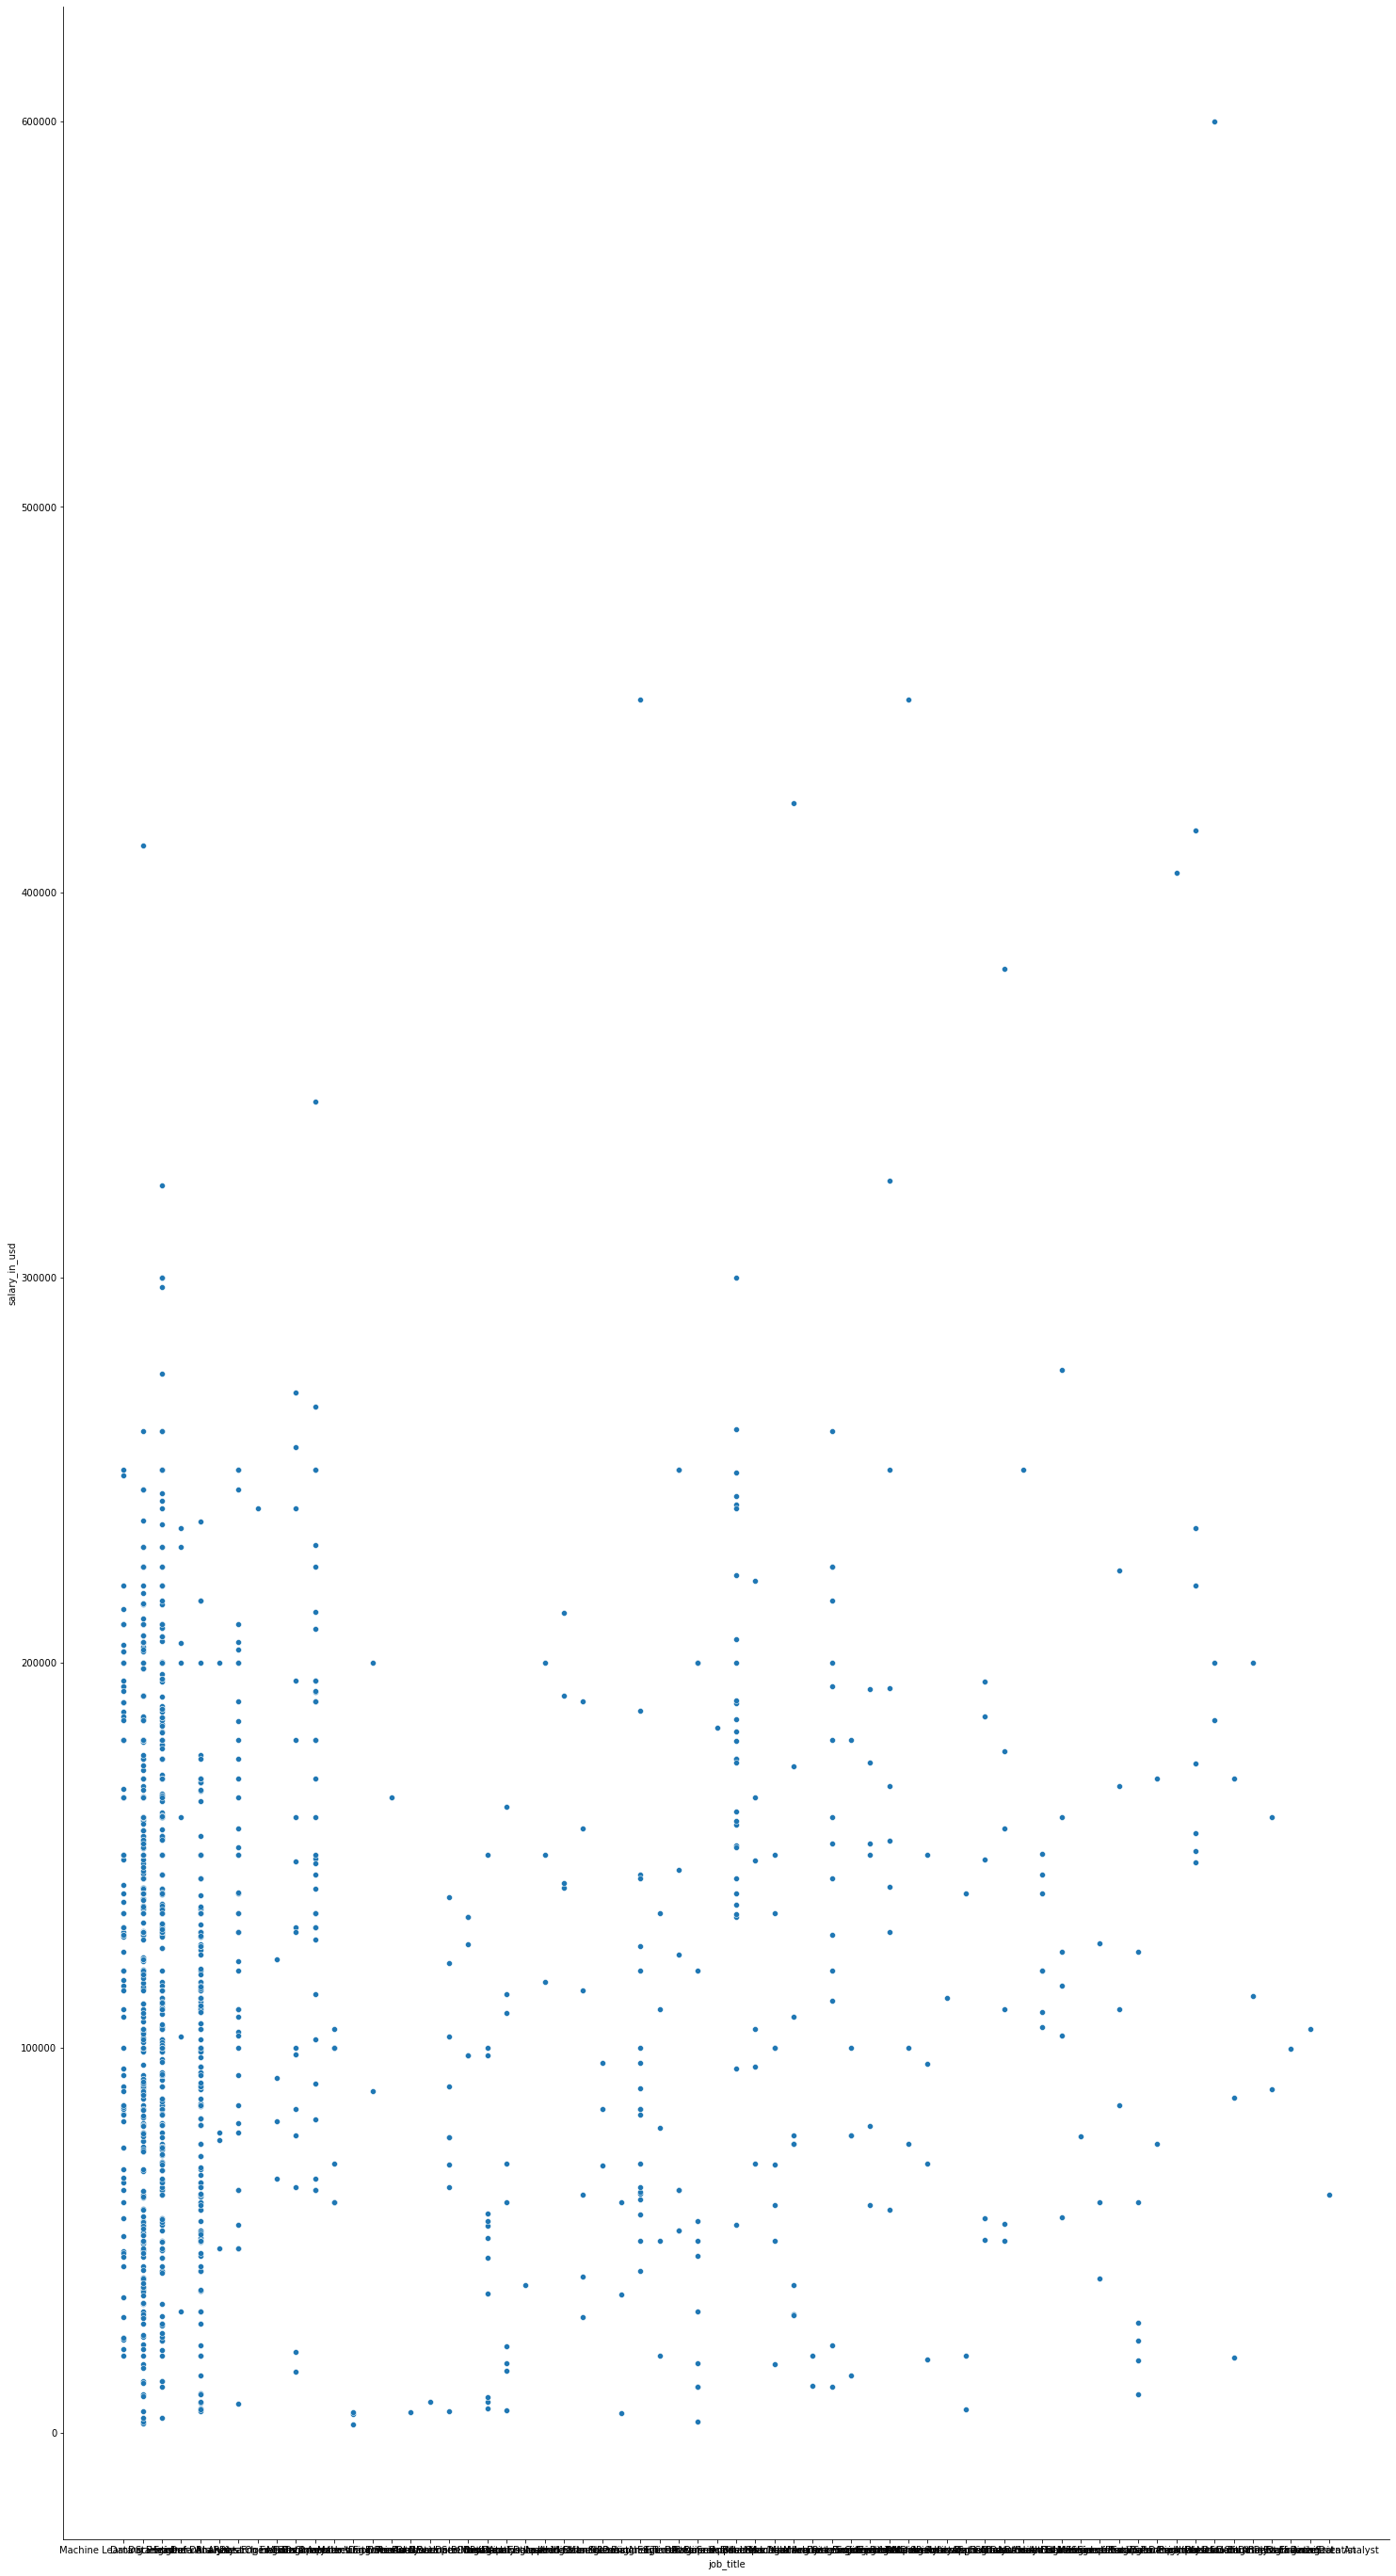

In [118]:
# Which role has the highest salary employment wise?
highestSalary = sns.pairplot(salaries, x_vars=['job_title'], y_vars=['salary_in_usd'])
highestSalary.fig.set_size_inches(100,50)

In [119]:
# Which employment types do employers prefer to hire?
preferredEmpType = salaries['employment_type'].value_counts()
preferredEmpType

Full-time    1306
Part-time      13
Contract        8
Freelance       5
Name: employment_type, dtype: int64

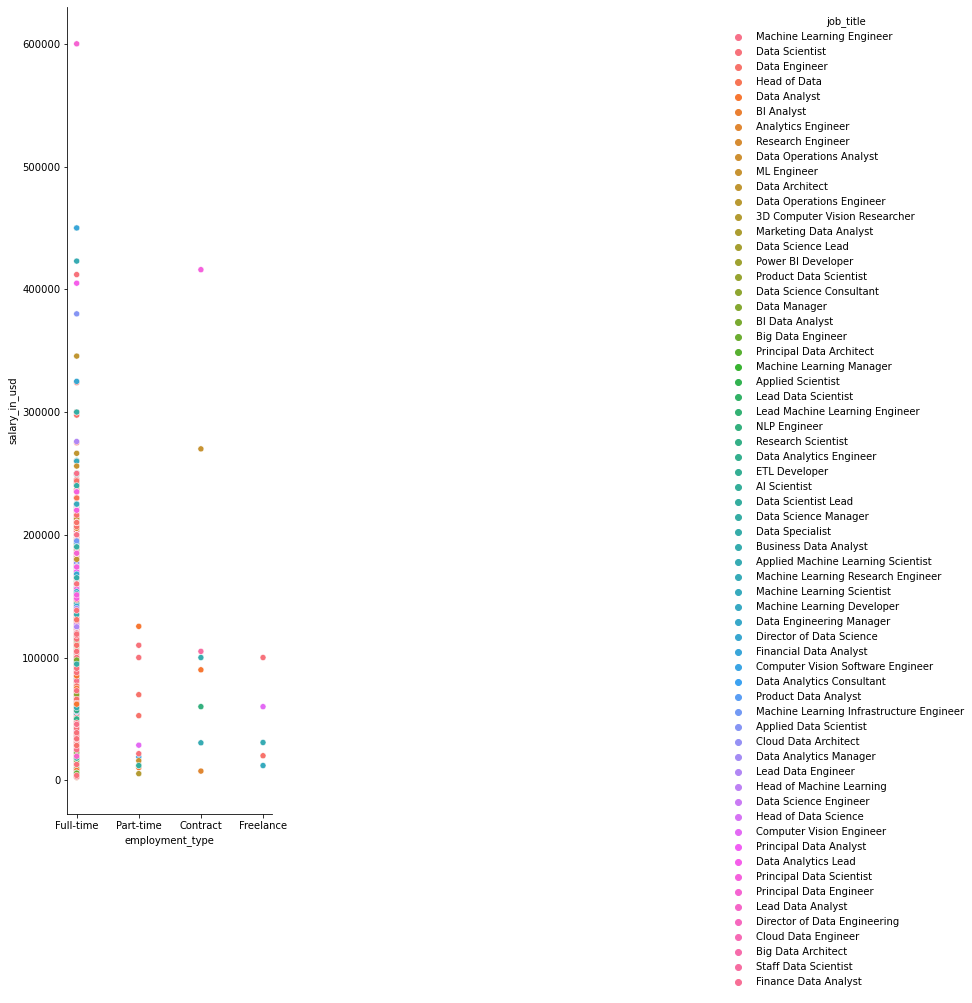

In [120]:
# What Emploment Type earns the highest salary among all Job Titles?
highestSalary = sns.pairplot(salaries, x_vars=['employment_type'], y_vars=['salary_in_usd'], hue='job_title')
highestSalary.fig.set_size_inches(15,15)

In [121]:
# Which role and employment type are entry level candidates generally hired for?
juniorLevel = salaries.loc[salaries['experience_level'] == 'Junior']

preferredRoleFresher = juniorLevel['job_title'].value_counts()
print(preferredRoleFresher)

preferredEmpTypeFresher = juniorLevel['employment_type'].value_counts()
print('\n\n', preferredEmpTypeFresher)

Data Scientist                        37
Data Analyst                          25
Data Engineer                         20
Machine Learning Engineer             14
AI Scientist                           7
Data Science Consultant                5
BI Data Analyst                        5
Research Scientist                     4
Machine Learning Developer             3
Big Data Engineer                      3
Computer Vision Engineer               3
Computer Vision Software Engineer      3
Business Data Analyst                  3
Machine Learning Research Engineer     2
Applied Data Scientist                 2
ML Engineer                            2
3D Computer Vision Researcher          1
Analytics Engineer                     1
Applied Machine Learning Scientist     1
Data Specialist                        1
Data Analytics Engineer                1
Financial Data Analyst                 1
Power BI Developer                     1
BI Analyst                             1
Machine Learning

In [122]:
# Do employers hire more WFH vs WFO?
salaries['remote_ratio'].value_counts()

WFH       781
WFO       412
Hybrid    139
Name: remote_ratio, dtype: int64

In [123]:
# Which countries pay the highest per which roles?
for role in top5.index:
    print(role, end=': ')
    temp = salaries.loc[salaries['job_title'] == role]['salary_in_usd'].idxmax()
    topCountry, sal = salaries.iloc[temp]['company_location'], salaries.iloc[temp]['salary_in_usd']
    print(topCountry, ' $', sal)
    print()

Principal Data Engineer: US  $ 600000

Financial Data Analyst: US  $ 450000

Research Scientist: US  $ 450000

Applied Machine Learning Scientist: US  $ 423000

Principal Data Scientist: US  $ 416000



In [124]:
# What are the demographics of the employees?
empDemographics = salaries['employee_residence'].value_counts()
empDemographics[:10]

US    910
GB     83
IN     45
CA     38
DE     31
ES     29
FR     24
BR     17
GR     15
PT     12
Name: employee_residence, dtype: int64

In [125]:
# Are employers hiring higher experience level for roles?
highestHiringOnExpLvl = salaries['experience_level'].value_counts()
highestHiringOnExpLvl

Expert          803
Intermediate    337
Junior          147
Director         45
Name: experience_level, dtype: int64

In [126]:
# Does company size matter when it comes to experience level?
table = pd.pivot_table(salaries, values='salary_in_usd', index=['company_size'], 
                       columns=['experience_level'], aggfunc=np.mean).round(2)
table

experience_level,Director,Expert,Intermediate,Junior
company_size,,,,
Big Enterprise,203607.92,146769.10,98685.63,65467.11
Medium,189311.58,146023.23,93316.50,51274.82
Startup,196969.00,112282.52,53981.38,62934.49


In [127]:
# YoY salary growth at different experience levels
salaries.work_year.value_counts()

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64

In [128]:
data2020 = salaries.loc[salaries['work_year'] == 2020]
data2021 = salaries.loc[salaries['work_year'] == 2021]
data2022 = salaries.loc[salaries['work_year'] == 2022]

for lvl in salaries.experience_level.unique():
    print(lvl)
    avg2020 = data2020.groupby('experience_level').mean().loc[lvl, 'salary_in_usd']
    avg2021 = data2021.groupby('experience_level').mean().loc[lvl, 'salary_in_usd']
    avg2022 = data2022.groupby('experience_level').mean().loc[lvl, 'salary_in_usd']
    
    yoy20_21 = ((avg2021 - avg2020) / avg2020) * 100
    print('YoY Growth for 2020-2021: ', round(yoy20_21, 2))
    
    yoy21_22 = ((avg2022 - avg2021) / avg2021) * 100
    print('YoY Growth for 2021-2022: ', round(yoy21_22, 2))
    
    print()

Intermediate
YoY Growth for 2020-2021:  -0.67
YoY Growth for 2021-2022:  8.96

Expert
YoY Growth for 2020-2021:  -8.51
YoY Growth for 2021-2022:  17.07

Director
YoY Growth for 2020-2021:  10.54
YoY Growth for 2021-2022:  -17.81

Junior
YoY Growth for 2020-2021:  -5.44
YoY Growth for 2021-2022:  20.31



In [129]:
# How does a company hire employees based on demographics?
for country in salaries['company_location'].unique():
    print(country, end=' hires employees from ')
    USCompanies = salaries.loc[salaries['company_location'] == country]
    USHiringDemographics = USCompanies['employee_residence'].value_counts()[:5]
    print(dict(USHiringDemographics))
    print()

US hires employees from {'US': 907, 'IN': 5, 'BR': 3, 'ES': 2, 'BO': 2}

ES hires employees from {'ES': 26, 'PT': 1, 'FR': 1}

GB hires employees from {'GB': 82, 'FR': 1, 'VN': 1, 'PL': 1, 'HK': 1}

FR hires employees from {'FR': 18, 'DO': 1, 'US': 1}

CA hires employees from {'CA': 37, 'GB': 1, 'US': 1}

MX hires employees from {'MX': 3, 'AR': 1}

BR hires employees from {'BR': 14}

IN hires employees from {'IN': 35, 'FR': 1}

AU hires employees from {'AU': 9}

SG hires employees from {'SG': 2, 'IN': 1}

PT hires employees from {'PT': 9}

DE hires employees from {'DE': 29, 'PK': 2, 'US': 1, 'FR': 1, 'NL': 1}

NG hires employees from {'NG': 3}

CZ hires employees from {'CZ': 2, 'TN': 1}

TR hires employees from {'TR': 5}

PR hires employees from {'PR': 4}

FI hires employees from {'FI': 1}

AS hires employees from {'IN': 2}

TH hires employees from {'TH': 1}

NL hires employees from {'NL': 9}

GR hires employees from {'GR': 13}

DK hires employees from {'DK': 3, 'GR': 1}

BO hires empl

In [130]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [131]:
# Cleaned Dataset
salaries.to_csv('salaries-cleaned.csv')

In [133]:
df1 = pd.read_csv('AI_MLsalaries-cleaned.csv')
df1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2022,Intermediate,Full-time,Machine Learning Engineer,130000,USD,130000,US,WFO,US,Medium
1,1,2022,Intermediate,Full-time,Machine Learning Engineer,90000,USD,90000,US,WFO,US,Medium
2,2,2022,Intermediate,Full-time,Data Scientist,120000,USD,120000,US,WFH,US,Medium
3,3,2022,Intermediate,Full-time,Data Scientist,100000,USD,100000,US,WFH,US,Medium
4,4,2022,Intermediate,Full-time,Data Scientist,85000,USD,85000,US,WFH,US,Medium
